In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
csv_path = Path("outputs/Fires_2015.csv")
df_2015 = pd.read_csv(csv_path)

df_2015

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2015,6/5/2015,6/5/2015,1,7.054897,Lightning
1,2015,6/11/2015,6/11/2015,14,11.887600,Unknown / Unidentified
2,2015,12/25/2015,12/29/2015,11,1287.388000,Powerline
3,2015,9/10/2015,9/28/2015,14,70846.530000,Unknown / Unidentified
4,2015,7/2/2015,7/2/2015,7,357.590300,Arson
...,...,...,...,...,...,...
303,2015,6/4/2015,6/4/2015,14,4.027377,Unknown / Unidentified
304,2015,11/8/2015,11/8/2015,14,1.193676,Unknown / Unidentified
305,2015,12/11/2015,12/11/2015,14,2.801698,Unknown / Unidentified
306,2015,10/7/2015,10/7/2015,18,2.154247,Escaped Prescribed Burn


In [3]:
# Convert 'Alarm Date' to datetime
df_2015['Alarm Date'] = pd.to_datetime(df_2015['Alarm Date'])

# Extract month name
df_2015['Month'] = df_2015['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2015 = df_2015.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2015['Month'] = pd.Categorical(monthly_summary_2015['Month'], categories=months_order, ordered=True)
monthly_summary_2015 = monthly_summary_2015.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2015['Total Acres Burned'] = monthly_summary_2015['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2015)

        Month  Number of Incidents  Total Acres Burned
4     January                    2               79.83
3    February                    7             7312.70
7       March                    5               25.00
0       April                   12             1212.78
8         May                   13              243.10
6        June                   43            70669.97
5        July                  123           468367.61
1      August                   50            75765.35
11  September                   27           150352.07
10    October                   14             1944.96
9    November                    7               89.05
2    December                    5             1315.06


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


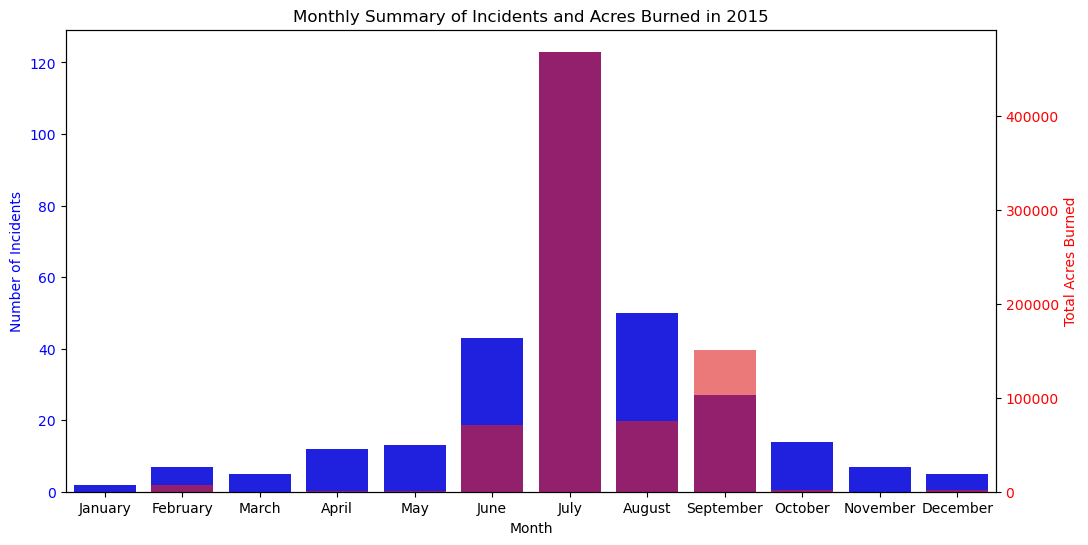

In [4]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2015, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2015, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2015')

output_path = Path("outputs")
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file in the "output" folder
output_file = os.path.join(output_path, "monthly_summary_2015.png")
plt.savefig(output_file)

plt.show()